# Аналитика в авиакомпании

Проектная работа модуля "Сбор и хранение данных",часть Аналитика средствами Python на примере аналитики в авиакомпании.
Цель проекта (исходя из формулировки задачи) - проанализировать рейсы за заданный период вывести определенные закономерности по распределению рейсов по городам и маршрутам.

В условии задачи не сказано,допустимо предположить, что данные закомерности в дальнейшем могут быть использованы для составления карты полетов на будующий период. 

Задачи проекта:
1. подготовить данные к анализу;
2. выбрать топ-10 городов по количеству рейсов;
3. построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
4. сделать выводы по каждому из графиков, пояснить результат.


Задача 1. подготовка данных для анализа
для подготовки данных для анализа неоходимо провести следюущие опреации сданными.
1. импорт 
2. проверка типов данных
3. предобработка данных, если она понадобится.
Инструмент реализации задачи билиотека Pandas

In [100]:
import pandas as pd

In [101]:
df_aircraft=pd.read_csv('/datasets/query_1.csv')

In [102]:
df_city=pd.read_csv('/datasets/query_3.csv')

In [103]:
df_aircraft.info()
df_aircraft.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [104]:
df_city.info()
df_city.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


пропуски данных в обоих дата сетах отсуствют, замена типов данных не нужна.

выберем топ 10 городов по количеству рейсов и визуализируем данные.
Инструменты реализации задачи билиотека Pandas,библиотеки, связанные с визуализацией данных (Seaborn и matplotlib)  

In [105]:
df_city_top_10 = df_city.nlargest(10,'average_flights')
print(df_city_top_10)

               city  average_flights
43           Москва       129.774194
70  Санкт-Петербург        31.161290
54      Новосибирск        17.322581
33       Красноярск        11.580645
20     Екатеринбург        11.322581
67   Ростов-на-Дону        10.193548
63            Пермь        10.129032
10           Брянск        10.000000
74             Сочи         9.612903
84        Ульяновск         9.580645


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Верно

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

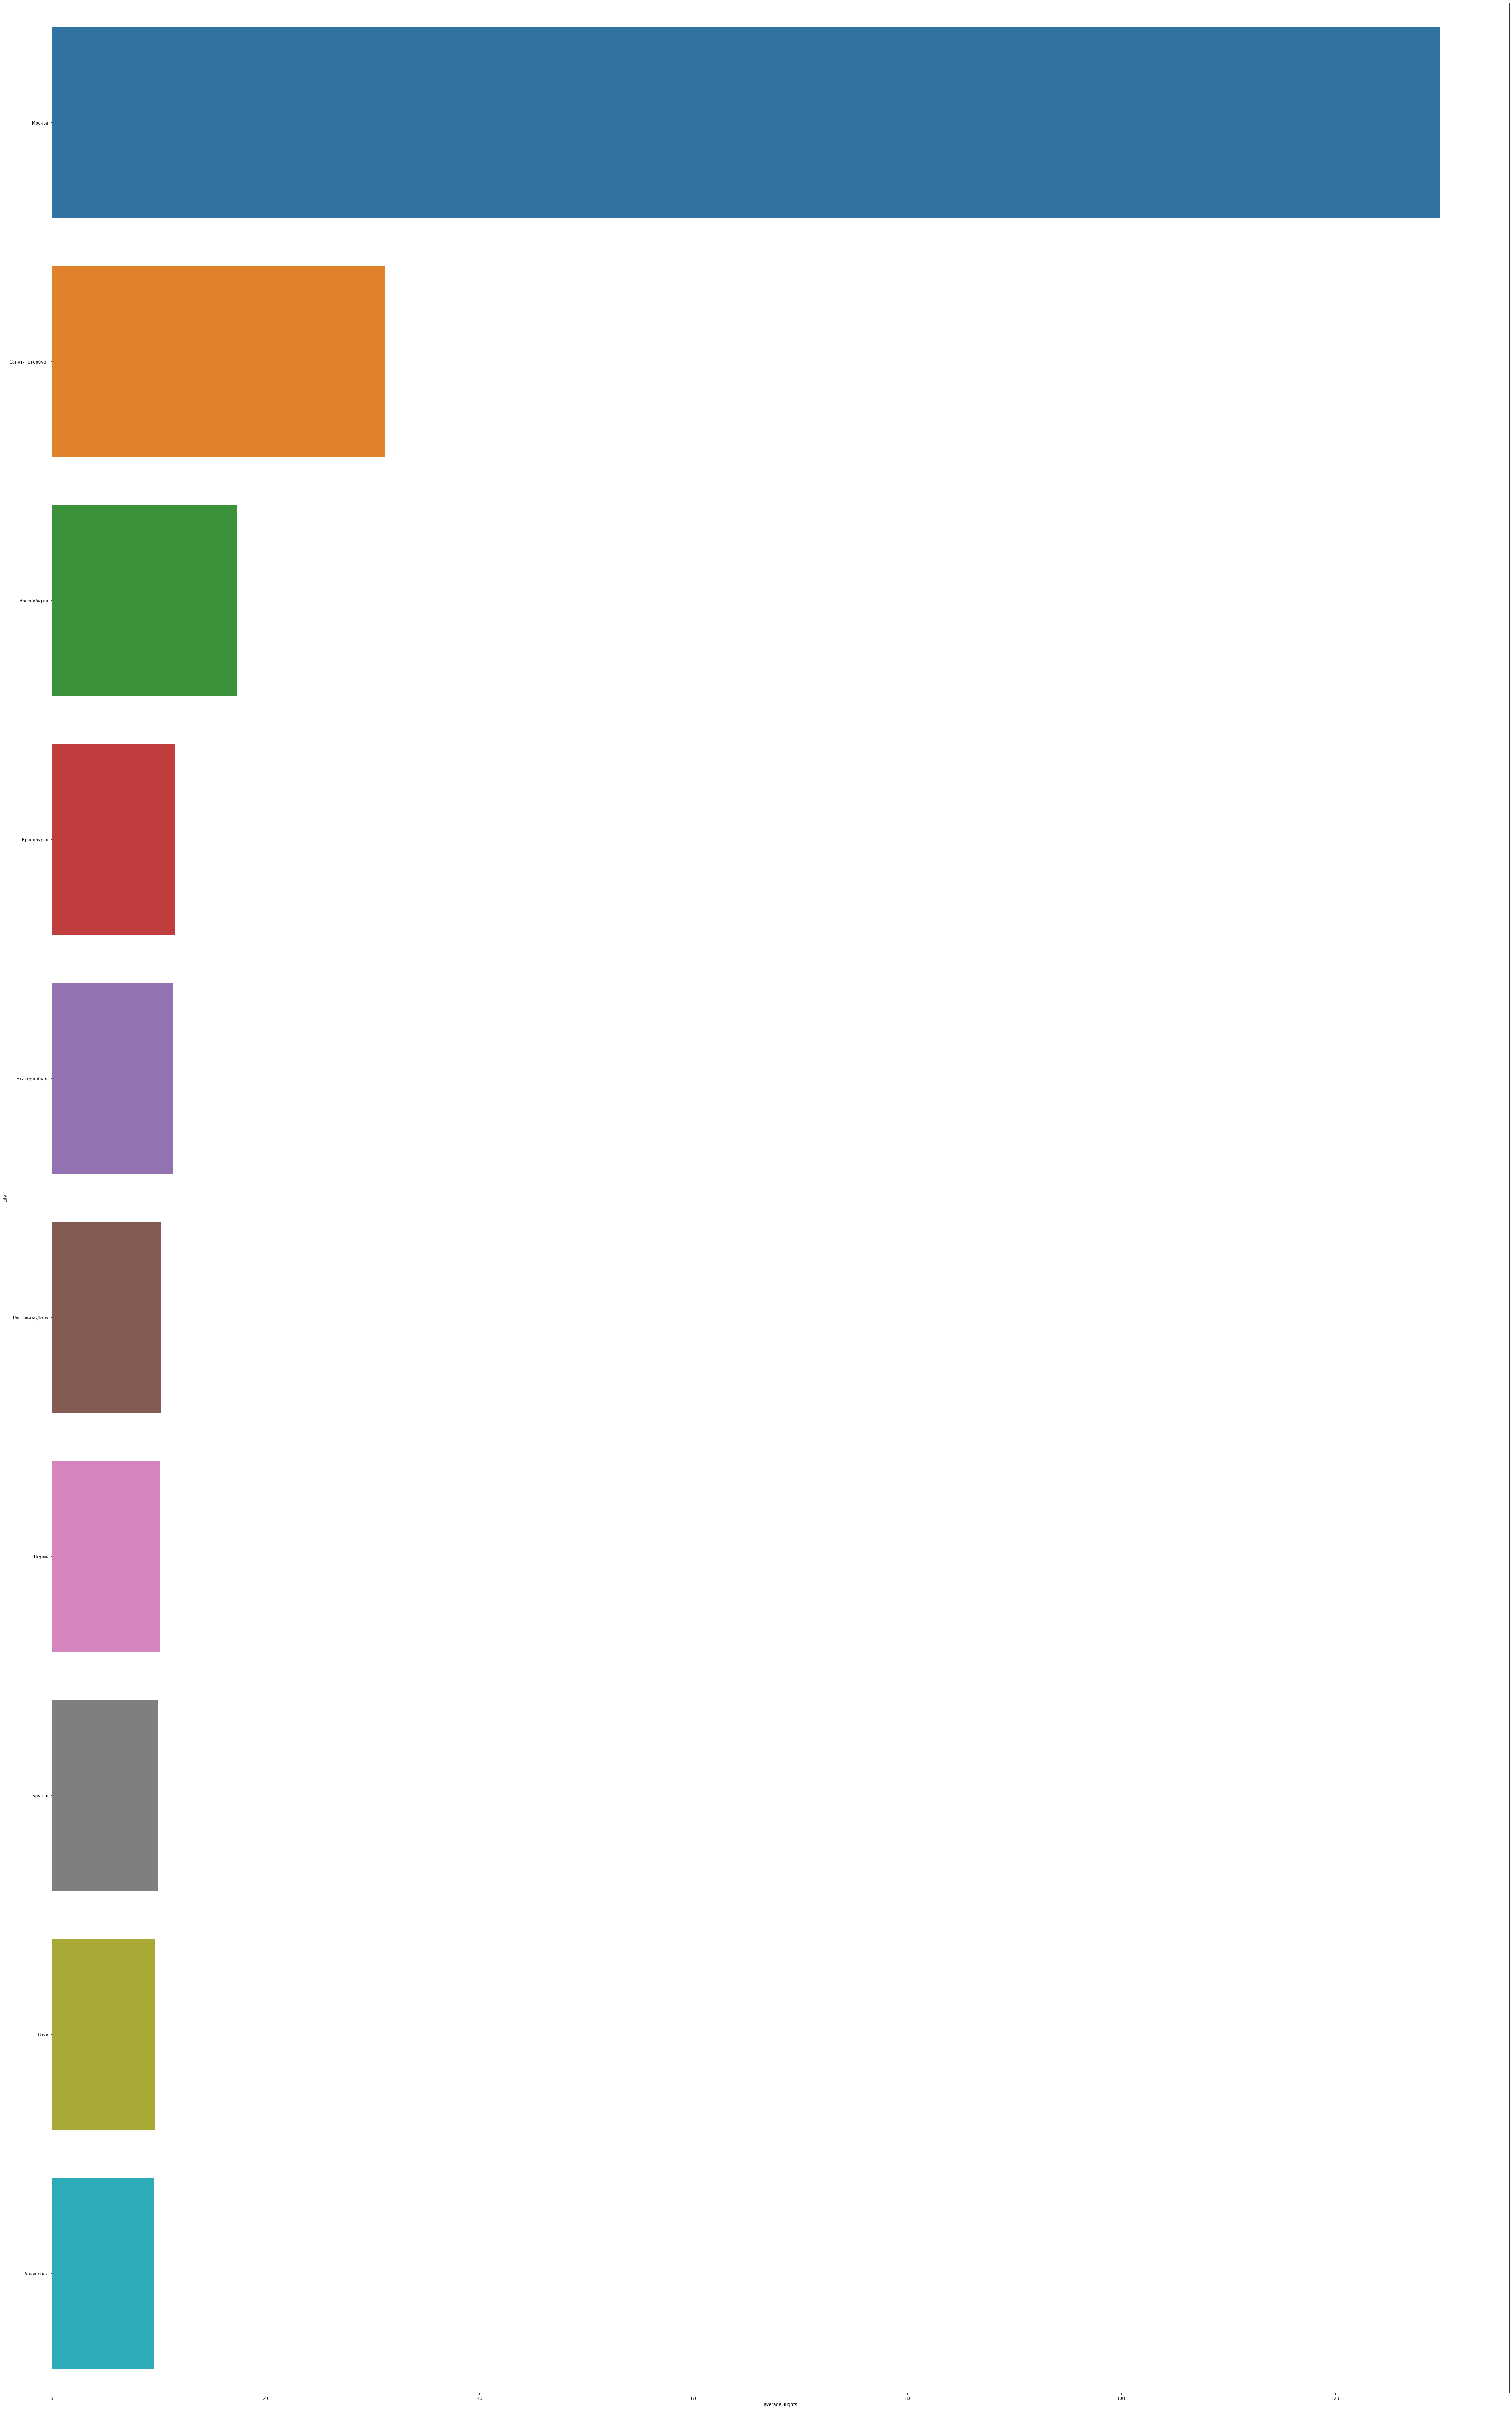

In [107]:
sns.barplot(x='average_flights', y='city', data=df_city_top_10)

plt.show()

Вывод списку топ 10 городов.
Наиболее популярное направление перелетов-Москва, с количеством порядка 130 рейсов за день в сентябре 2018 года.
Она лидирует по отношению к другим городам с значительным отрывом - более 3-х раз от второго по списку города Санкт-Петербурга.
Явно можно выделить только топ три городов-Москва, Санкт-Петербург, Новосибирск. Далее города распределяются в порядке убывания с минимальным отрывом.
Основные самые популярные направления - Москва, Санкт-Петербург,Восточная и Западная Сибирь.

визуализируем данные модели самолетов и количество рейсов
Инструменты реализации билиотека Pandas,библиотеки, связанные с визуализацией данных (Seaborn и matplotlib)  

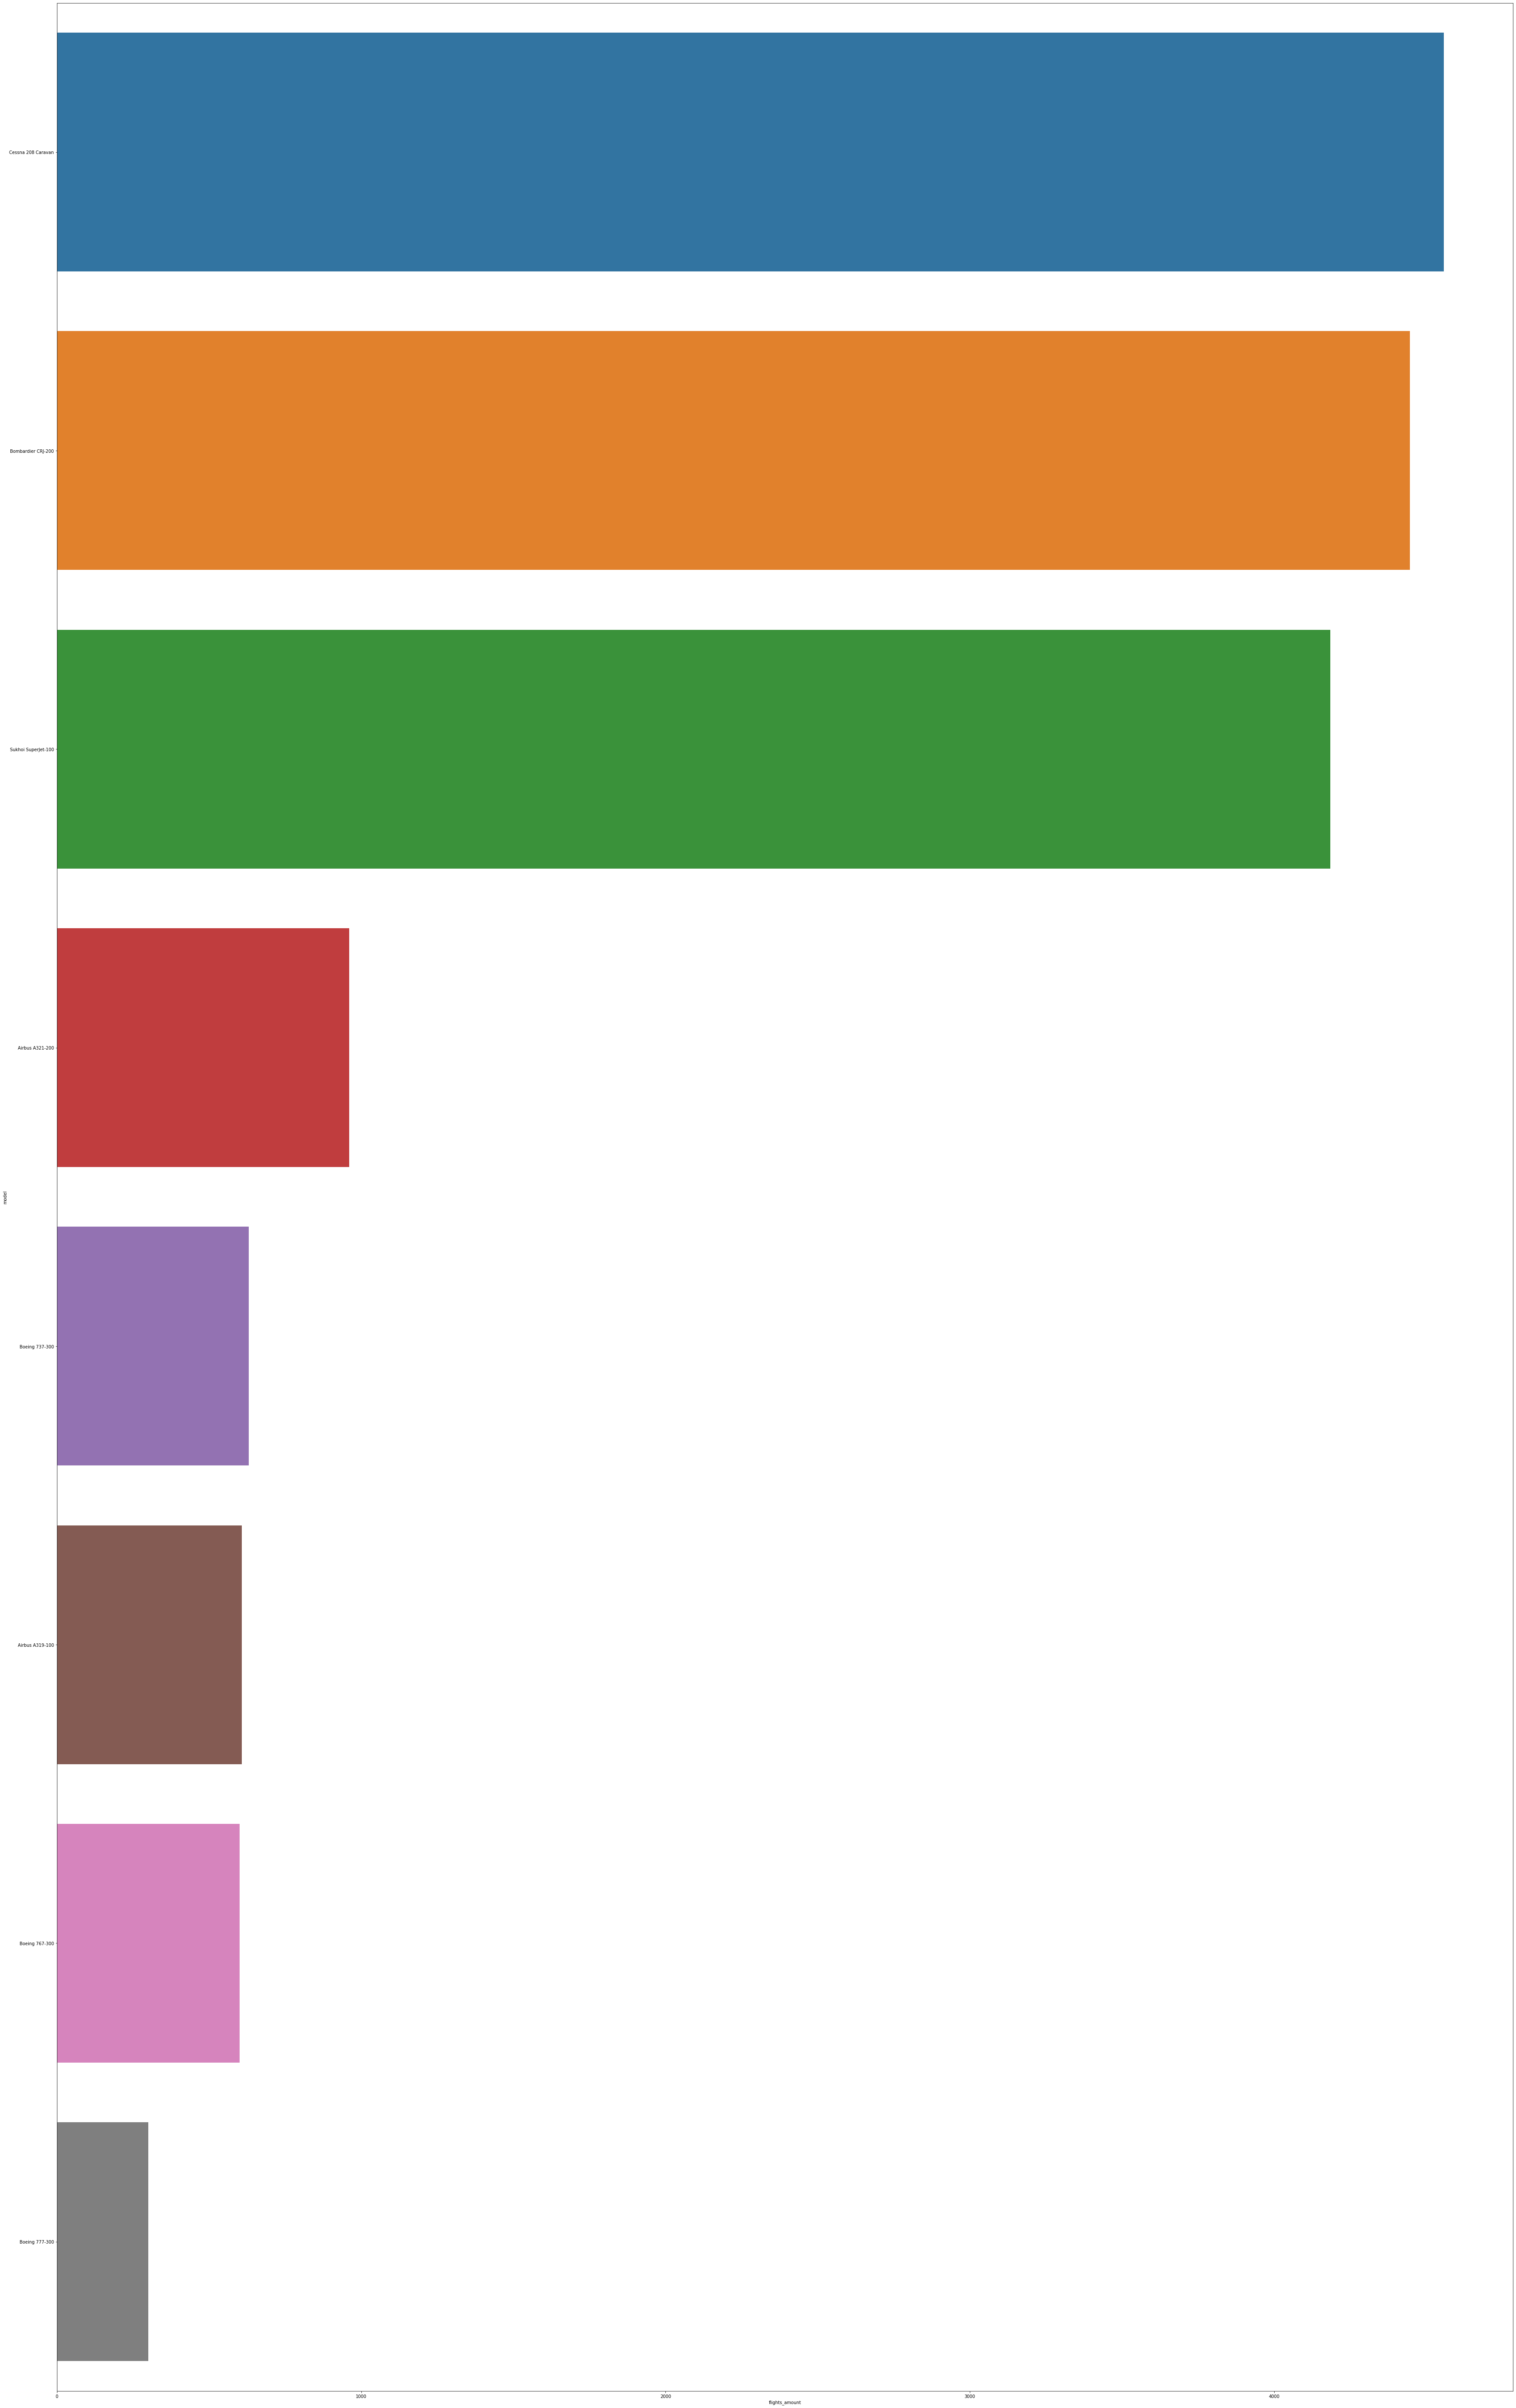

In [108]:
visualization_data = df_aircraft.sort_values(by='flights_amount', ascending=False).reset_index()
sns.barplot(x='flights_amount', y='model', data=visualization_data)

plt.show()

Наибольшее количество рейсов совершено на самолетах модели Cessna 208 Caravan это маленький самолет для перевозки небольшой группы пассажиров. Можно предоположить, что наиболее востребованными в сентябре 2018г. были частные рейсы.
Далее Bombarder CRJ200 аналог суперджета, тоже с небольшой пассажтровместимостью (до 50 человек) - можно предположить, что это регулряные частые рейсы на небольшие расстояния или частные рейсы;далее - Sukhoi Superjet 100 (вместимость до 100 человек).
Это топ три модели - по которым наблюдается явный отрыв по количеству рейсов.
Все остальные модели (большие самолеты с большой пассажировместимостью)- летали куда реже.
В целом, на уровне экспертных оценок/ можно предположить, что самое основное по количеству рейсов направление -частные рейсы. Бизнес-рейсы (до 50 человек) или регулярные рейсы с небольшим, на регулярным пассажиропотоком (возможно, рейсы между городами Санкт-Петербург и Москва - утренние-вечерние).
Для более полноценных и обоснованных выводов данных в рамках поставленной задачи недостаточно.


визуализируем данные города и количество рейсов
Инструменты реализации задачи билиотека Pandas,библиотеки, связанные с визуализацией данных (Seaborn и matplotlib)  

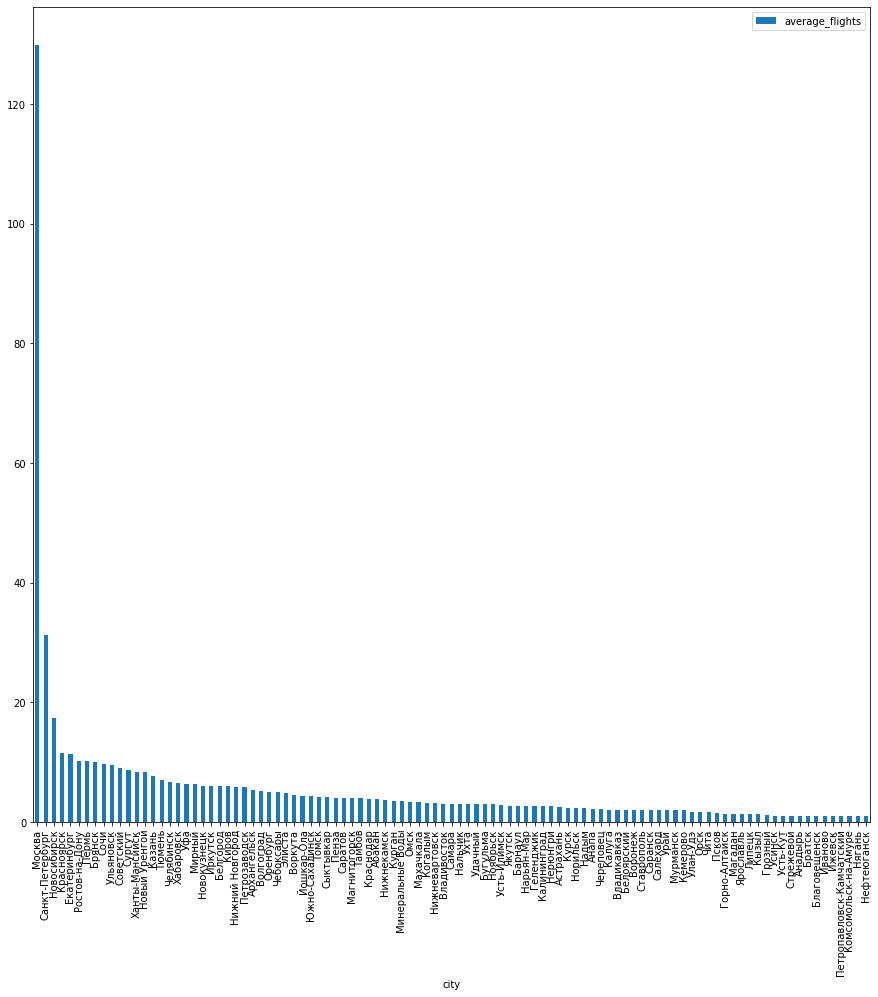

In [109]:
visualization_data_1 = df_city.sort_values(by='average_flights', ascending=False).reset_index()

visualization_data_1.plot(x='city',y='average_flights',kind ='bar',grid = False, figsize=[15,15])
plt.show()




На графике распределения среднем количестве рейсов за сентябрь 2018года четко прослеживаются три города с наибольшим количеством рейсов-это крупнейшие города России, экономические центры . 
Далее следуют крупные областные города (экономические центры) менее крупных регионов (ФО).
Наиболее популярные георграфические направления:Москва, Санкт-Петербург, Сибирь, Урал (центральная часть), крупные города ЮФО и Поволжья.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Все визуализации построены верно и так же ты пишешь верные выводы
</div>

Общие выводы:
Наиболее популярными по количеству рейсов являются пять географических направлений:
Москва,Санкт-Петербург, Сибирь (Восточная и Западная),Урал, ЮФО (курортные и экономические зоны).
Наиболее популярные города:
Москва, Санкт-Петербург,Новосибирск.
Далее распределение по городам по количеству рейсов более ровное с постепенным снижением.
Самые популярные модели самолетов - самолеты с малым или средним (до 100 человек) пасажировместимостью, что дает возможность сделать предположение, что это частные или бизнес-рейсы или регулярные рейсы с малым пассажиропотоком.
В целом, для того, чтобы сделать точные аргументированные выводы, информации мало.
Можно лишь сделать следующее допущение.
Основным, самымо востребованным направлением являются частные рейсы или рейсы, которые необходимы часто,но, рассчитанные на небольшую загрузку судна.
Основные направление полетов - крупные экономические или туристические центры.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Спасибо за подробный вывод, тут тоже всё верно

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Проект принят, пусть у тебя и дальше всё получается, удачи!)